In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
data = pd.read_excel("/content/final_data.xlsx")
data

,Comment
0,So proud of Ireland waiving the visa requireme...
1,respect to everyone whos fighting in the war a...
2,Stay STRONG Ukraine ðŸ‡ºðŸ‡¦ The WHOLE world i...
3,"To all Ukranians,We cannot wait to welcome you..."
4,Patel will happily grant visas to rich Russian...
...,...
4247,Superstitious graffiti bullying nonsense right...
4248,Won't be long now that the Ukrainians invade r...
4249,Please let's pray for peace
4250,"Sorry, it doesn't sell very well, and nobody's..."


In [3]:
data.isnull().sum()

Comment    0
dtype: int64

In [4]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [6]:
data["Comment"] = data["Comment"].apply(clean)

In [7]:
data["Comment"]

0       proud ireland waiv visa requir absolut right t...
1       respect everyon whos fight war condol everyon ...
2       stay strong ukrain ðÿ‡ºðÿ‡¦ whole world watch ...
3       ukraniansw cannot wait welcom eu famili love i...
4       patel happili grant visa rich russiansrich ind...
                              ...                        
4247    superstiti graffiti bulli nonsens right childr...
4248                     wont long ukrainian invad russia
4249                                  pleas let pray peac
4250             sorri doesnt sell well nobodi buy moment
4251                                        good day edrl
Name: Comment, Length: 4252, dtype: object

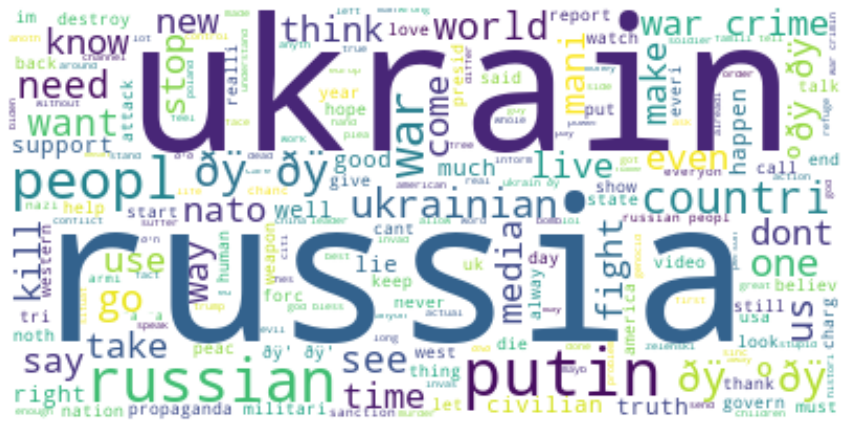

In [8]:
text = " ".join(i for i in data.Comment)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Happy"] = [sentiments.polarity_scores(i)["pos"] for i in data["Comment"]]
data["Sad"] = [sentiments.polarity_scores(i)["neg"] for i in data["Comment"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Comment"]]
data = data[["Comment", "Happy", "Sad", "Neutral"]]
data

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Comment,Positive,Negative,Neutral
0,proud ireland waiv visa requir absolut right t...,0.256,0.000,0.744
1,respect everyon whos fight war condol everyon ...,0.145,0.668,0.187
2,stay strong ukrain ðÿ‡ºðÿ‡¦ whole world watch ...,0.333,0.000,0.667
3,ukraniansw cannot wait welcom eu famili love i...,0.259,0.000,0.741
4,patel happili grant visa rich russiansrich ind...,0.456,0.129,0.415
...,...,...,...,...
4247,superstiti graffiti bulli nonsens right childr...,0.000,0.000,1.000
4248,wont long ukrainian invad russia,0.000,0.000,1.000
4249,pleas let pray peac,0.434,0.000,0.566
4250,sorri doesnt sell well nobodi buy moment,0.000,0.232,0.768


In [12]:
data

,Comment,Positive,Negative,Neutral
0,proud ireland waiv visa requir absolut right t...,0.256,0.000,0.744
1,respect everyon whos fight war condol everyon ...,0.145,0.668,0.187
2,stay strong ukrain ðÿ‡ºðÿ‡¦ whole world watch ...,0.333,0.000,0.667
3,ukraniansw cannot wait welcom eu famili love i...,0.259,0.000,0.741
4,patel happili grant visa rich russiansrich ind...,0.456,0.129,0.415
...,...,...,...,...
4247,superstiti graffiti bulli nonsens right childr...,0.000,0.000,1.000
4248,wont long ukrainian invad russia,0.000,0.000,1.000
4249,pleas let pray peac,0.434,0.000,0.566
4250,sorri doesnt sell well nobodi buy moment,0.000,0.232,0.768


In [20]:
data_positive= data[data['Positive']>=0.7]

In [21]:
data_positive

,Comment,Positive,Negative,Neutral
10,ukrain proud pleas pray god help keep countri,0.718,0.0,0.282
31,god bless ukrain,0.831,0.0,0.169
103,love respect russia ðÿ‡·ðÿ‡ºâ¤ï¸,0.785,0.0,0.215
115,god help us ðÿ™,0.706,0.0,0.294
160,hahaha top left that good one,0.735,0.0,0.265
...,...,...,...,...
4204,god bless ðÿ™,0.831,0.0,0.169
4206,god bless,1.000,0.0,0.000
4226,sweet sweet peach,0.857,0.0,0.143
4244,god bless,1.000,0.0,0.000


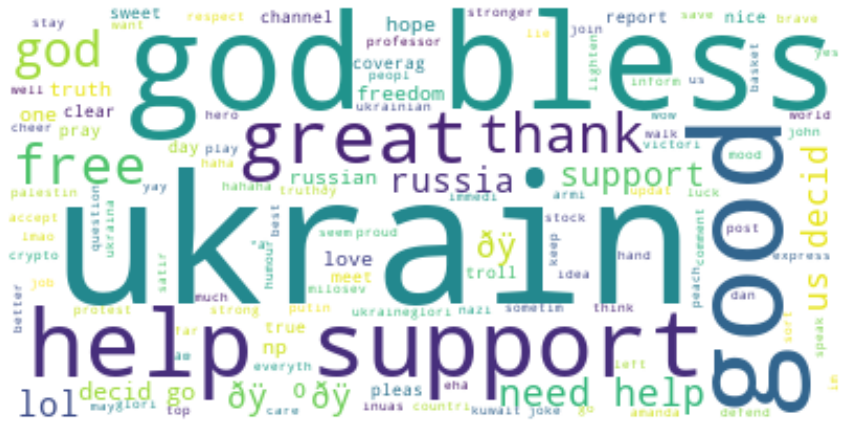

In [22]:
positive =' '.join([i for i in data_positive['Comment'][data_positive['Positive'] > data_positive["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
data_negative= data[data['Negative']>=0.7]
data_negative

,Comment,Positive,Negative,Neutral
58,someon pleas stop war,0.000,0.753,0.247
161,sicken let poor peopl wrong race,0.000,0.752,0.248
169,stop war pleas stop ðÿ‡±ðÿ‡°ðÿ‡±ðÿ‡°,0.000,0.806,0.194
228,big shame russian shame shame,0.000,0.823,0.177
236,propaganda,0.000,1.000,0.000
...,...,...,...,...
3876,propaganda,0.000,1.000,0.000
3935,protest,0.000,1.000,0.000
3956,eu stay war war,0.000,0.796,0.204
4115,fire bomb late ðÿ'ˆðÿ'€,0.000,0.737,0.263


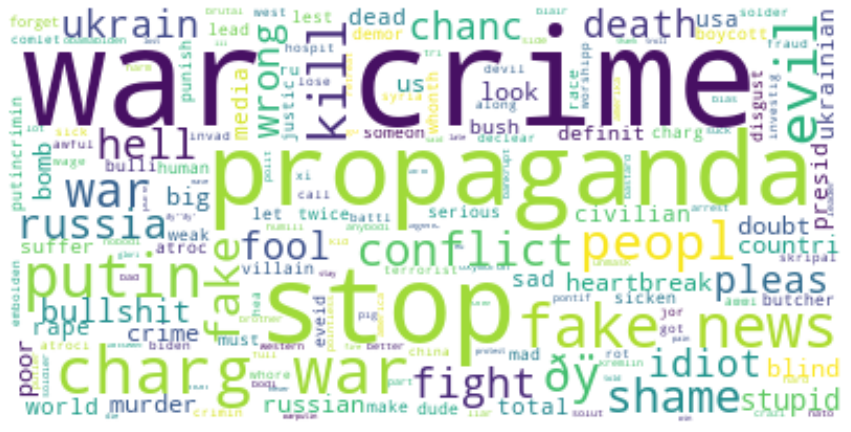

In [27]:
negative =' '.join([i for i in data_negative['Comment'][data_negative['Negative'] > data_negative["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
wordcloud
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



---



---
FROM HERE IT PREVIOUS


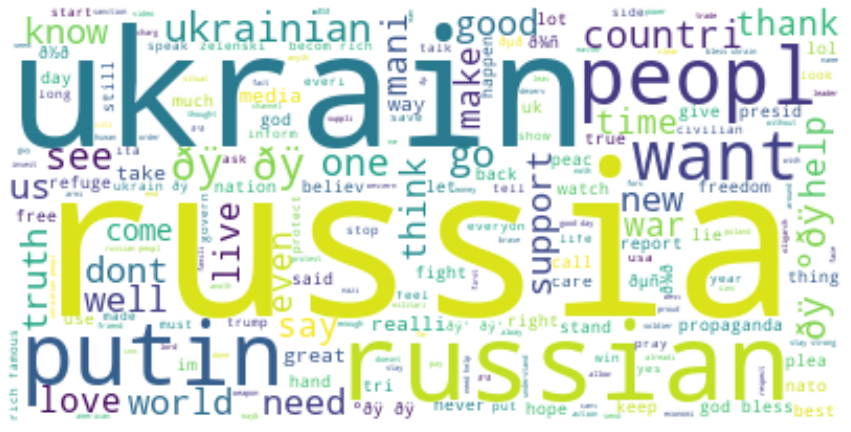

In [10]:
positive =' '.join([i for i in data['Comment'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

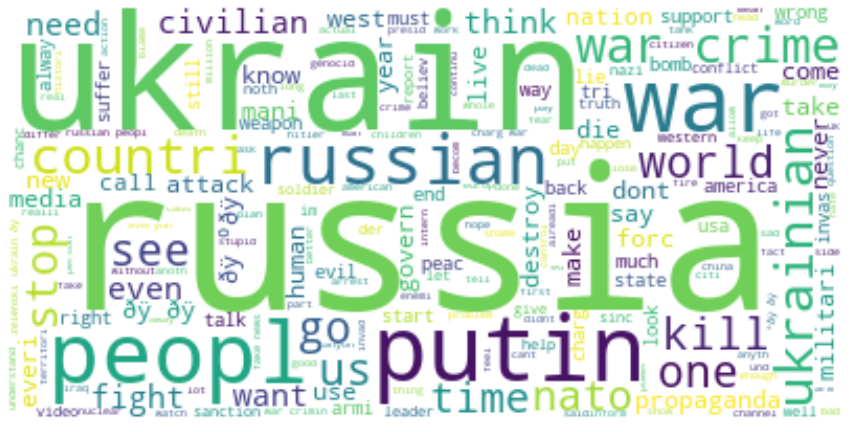

In [11]:
negative =' '.join([i for i in data['Comment'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
wordcloud
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()